# Visualize the DGGS GEBCO Gridded Bathymetry with xdggs

## Context

### Purpose

The DGGS GEBCO Gridded Bathymetry Dataset is highly valuable for various applications, especially when datasets have been transformed into DGGS (Healpix). Below, we demonstrate how to visualize this bathymetry data using an well-known colormap (`cmocean`).

### Description

In this notebook, we will:
- Open the DGGS (Healpix) transformed GEBCO Gridded Bathymetry Data 
- Select a colormap and visualize it with xdggs

## Contributions

### Notebook

- Tina Odaka, IFREMER (France), @tinaok
- Ola Formo Kihle, Independent Consultant / UW Contractor, (Norway), @ofk123
- Anne Fouilloux, Simula Research Laboratory (Norway) (reviewer), @annefou

## Bibliography and other interesting resources

- [GEBCO Gridded Bathymetry Data](https://www.gebco.net/data_and_products/gridded_bathymetry_data/)
- [xdggs](https://xdggs.readthedocs.io/en/latest/) Python package

Installing xdggs <br>
(and newest zarr version until pangeo-EOSC-notebook image is updated):

In [1]:
#!pip install -U zarr xarray git+https://github.com/xarray-contrib/xdggs.git

In [2]:
import warnings
import numpy as np
import xarray as xr
import xdggs
import fsspec

warnings.filterwarnings("ignore")
xr.set_options(display_max_rows=27)

In [3]:
fs = fsspec.filesystem("http")
url="https://data-fair2adapt.ifremer.fr/gebco/healpix_level_11.zarr"

ds=xr.open_zarr(url).pipe(xdggs.decode)
cell_centers = ds.dggs.cell_centers()
ds=ds.assign_coords(
    cell_centers.coords
)

In [4]:
lat = np.arange(57, 72, 0.01)
lon = np.arange(0, 15, 0.01)
full_lat = np.repeat(lat, len(lon))
full_lon = np.tile(lon, len(lat))
%time da = ds.gebco.dggs.sel_latlon(longitude=full_lon, latitude=full_lat).compute()

CPU times: user 5.12 s, sys: 2.55 s, total: 7.67 s
Wall time: 8.11 s


In [5]:
import cmocean
cmap = cmocean.tools.crop(
    cmocean.cm.topo, 
    vmin=da.min(), 
    vmax=da.max(), 
    pivot=0
)
da.dggs.explore(cmap=cmap)

Map(layers=[SolidPolygonLayer(filled=True, get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x7edff833…

vmin:  -3707.190082644628
pivot:  0.0
vmax:   2069.969387755102


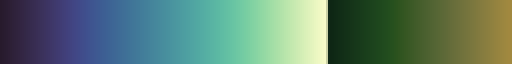

In [6]:
print('vmin: ', da.to_numpy().min())
print('pivot: ', 0.0)
print('vmax:  ', da.to_numpy().max())
cmap